<a href="https://colab.research.google.com/github/FREYDER18/PARCIAL-2025-1/blob/main/SOLUCION_PUNTO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**punto 2**

2. Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5 k Hz aplicado a la señal: \begin{equation}
x(t) = 3 \cos\left(1000{\pi}{t}\right) + 5 \sin(2000{\pi}{t}) + 10 \cos(11000{\pi}{t})
\end{equation}Realizar la simulacion del proceso de discretizácion. En caso de que la discretizácion no sea apropiada, diseñe y implemente un conversor adecuado para la señal estudiada.

Desarrollo Punto 2.  

- Codigo punto 2.

- Simulación de la señal muestreada a 5 kHz (con aliasing)
python
Copiar
Editar


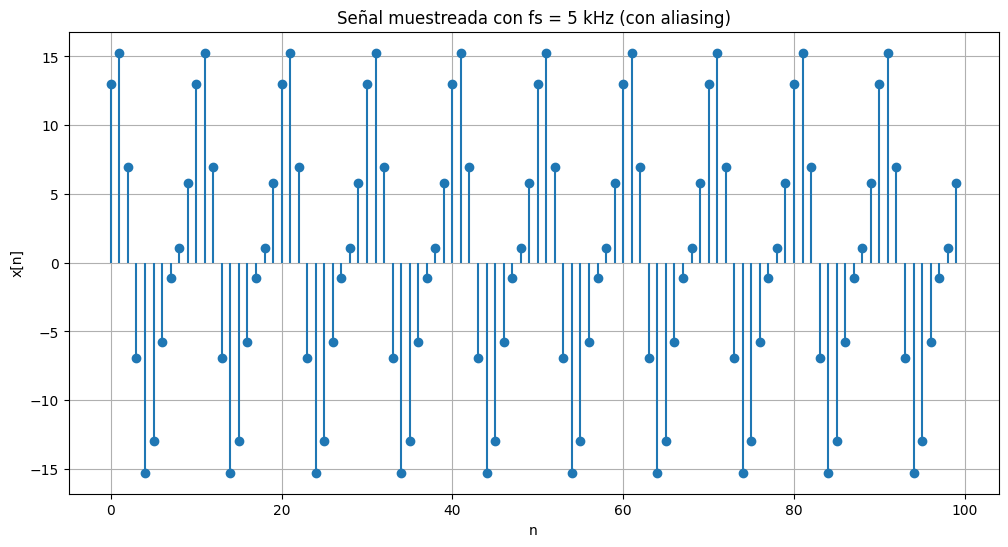

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia de muestreo (insuficiente para evitar aliasing)
fs = 5000  # Frecuencia de muestreo en Hz
Ts = 1 / fs  # Periodo de muestreo
n = np.arange(0, 100)  # 100 muestras
t = n * Ts  # Tiempo asociado a cada muestra

# Señal compuesta por tres componentes: dos dentro del rango y una fuera (5500 Hz > fs/2)
x_n = 3 * np.cos(2 * np.pi * 500 * t) + \
      5 * np.sin(2 * np.pi * 1000 * t) + \
      10 * np.cos(2 * np.pi * 5500 * t)

# Graficar la señal muestreada (discreta)
plt.figure(figsize=(12, 6))
plt.stem(n, x_n, basefmt=" ")  # Gráfico de tallos, ideal para señales discretas
plt.title("Señal muestreada con fs = 5 kHz (con aliasing)")
plt.xlabel("n")  # Eje de índice de tiempo discreto
plt.ylabel("x[n]")  # Valor de la señal
plt.grid(True)
plt.show()


1. Objetivo del Código
Demostrar gráficamente el efecto del aliasing: cuando una señal contiene componentes de frecuencia mayores que la mitad de la frecuencia de muestreo (Nyquist), estas se reflejan dentro del espectro válido y se distorsiona la señal.

- Diseño de un conversor adecuado: simulación con frecuencia de muestreo suficiente (12 kHz) y señal continua original

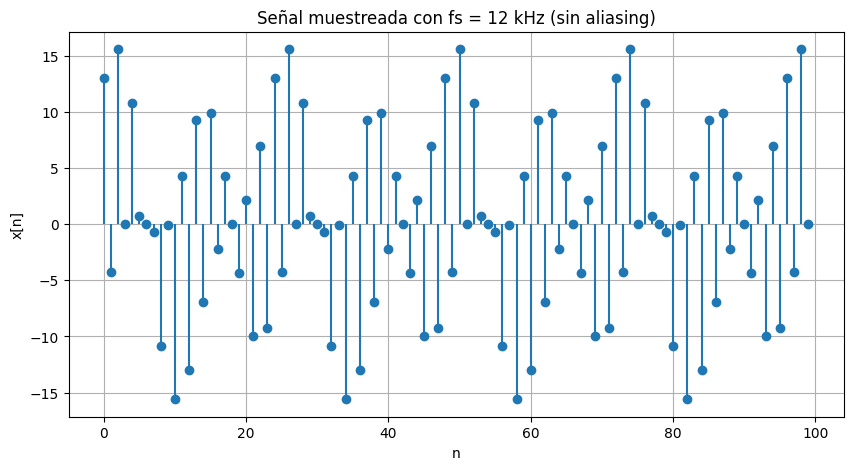

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia de muestreo adecuada (fs = 12 kHz)
fs = 12000  # Hz, el doble de la máxima frecuencia presente en la señal (Nyquist)
Ts = 1 / fs  # Periodo de muestreo
n = np.arange(0, 100)  # Índices de muestreo
t = n * Ts  # Tiempo real de cada muestra

# Señal original compuesta por 3 frecuencias: 500 Hz, 1000 Hz y 5500 Hz
x_n = 3 * np.cos(2 * np.pi * 500 * t) + \
      5 * np.sin(2 * np.pi * 1000 * t) + \
      10 * np.cos(2 * np.pi * 5500 * t)

# Graficar señal muestreada correctamente (sin aliasing)
plt.figure(figsize=(10, 5))
plt.stem(n, x_n, basefmt=" ")
plt.title("Señal muestreada con fs = 12 kHz (sin aliasing)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()


1. Objetivo del Código
Demostrar que al aplicar una frecuencia de muestreo suficientemente alta, no se produce aliasing, y las componentes de alta frecuencia se preservan correctamente.

- Comparación señal continua y señal discreta muestreada (superpuestas)



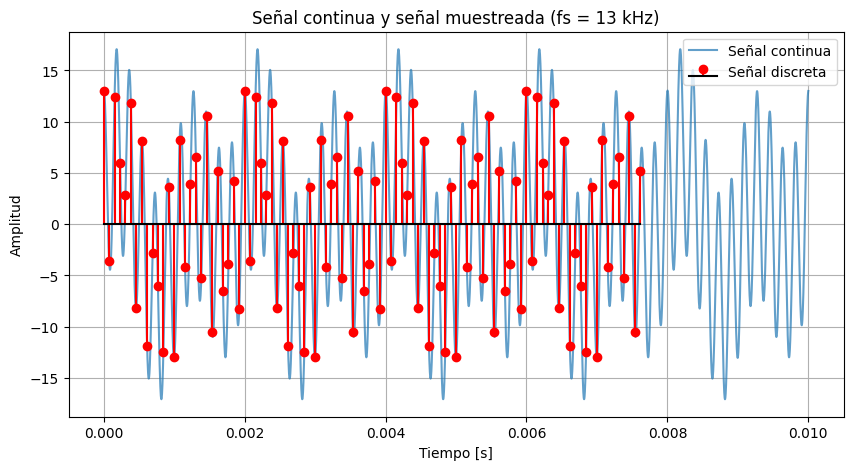

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal continua (alta resolución de tiempo)
t_cont = np.linspace(0, 0.01, 10000)  # Tiempo continuo (de 0 a 10 ms)
x_cont = 3 * np.cos(2 * np.pi * 500 * t_cont) + \
         5 * np.sin(2 * np.pi * 1000 * t_cont) + \
         10 * np.cos(2 * np.pi * 5500 * t_cont)  # Señal continua compuesta

# Parámetros del muestreo
fs = 13000  # Frecuencia de muestreo en Hz (mayor que 2*f_max = 11000 Hz)
Ts = 1 / fs  # Periodo de muestreo
n = np.arange(0, 100)  # Índices de muestra
t_disc = n * Ts  # Tiempos discretos (muestreados)

# Señal muestreada con fs = 13 kHz (sin aliasing)
x_disc = 3 * np.cos(2 * np.pi * 500 * t_disc) + \
         5 * np.sin(2 * np.pi * 1000 * t_disc) + \
         10 * np.cos(2 * np.pi * 5500 * t_disc)

# Graficar ambas señales
plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, label="Señal continua", alpha=0.7)  # Línea azul: señal original
plt.stem(t_disc, x_disc, linefmt='r-', markerfmt='ro', basefmt='k-', label="Señal discreta")  # Tallos rojos: muestras
plt.title("Señal continua y señal muestreada (fs = 13 kHz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Objetivo del código
Visualizar cómo la señal continua y su versión muestreada adecuadamente (sin aliasing) se alinean cuando se usa una frecuencia de muestreo superior al doble de la frecuencia máxima de la señal.